# Modelo de Regresión Lineal Múltiple - Dataset Advertising

**Autor:** Agustín Villarreal  
**Correo:** agustin.villarreal0743@alumnos.udg.mx  
**Programa:** Maestría en Cómputo Aplicado  

---

## Objetivo
Generar y evaluar un modelo de regresión lineal múltiple para predecir las ventas (Sales) en función de los gastos en publicidad (TV, Radio, Newspaper) utilizando **statsmodels**.

## Metodología
1. Partición de datos: 70% entrenamiento, 30% validación
2. Ajuste del modelo de regresión lineal múltiple con statsmodels
3. Evaluación mediante coeficiente de determinación (R²)
4. Cálculo del Error Residual Estándar en Ratio (RSE%)

## 1. Importación de Librerías

In [2]:
# Librerías para manipulación y análisis de datos
import pandas as pd
import numpy as np

# Librería para regresión lineal
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


## 2. Carga de Datos desde GitHub

In [4]:
# ============================================================================
# CARGAR DATASET DESDE GITHUB
# ============================================================================
# Instrucciones:
# 1. Ve a tu archivo Advertising.csv en GitHub
# 2. Haz clic en el botón "Raw"
# 3. Copia la URL completa
# 4. Reemplázala en la variable github_url

# URL del archivo en GitHub (formato raw)
github_url = 'https://raw.githubusercontent.com/agusvillarreal/MCAP/main/MINERIA/Advertising.csv'

# Alternativa: Si solo quieres probar el código, usa este dataset público:
# github_url = 'https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv'

try:
    print("📥 Cargando dataset desde GitHub...")
    ads = pd.read_csv(github_url)
    print("✅ Dataset cargado exitosamente\n")

except Exception as e:
    print(f"❌ Error: {e}")
    print("\n💡 SOLUCIONES:")
    print("1. Verifica que la URL sea correcta (debe ser la URL 'Raw')")
    print("2. O sube manualmente el archivo usando el ícono de carpeta 📁")
    print("3. O usa Google Drive (ver celda siguiente)")
    raise

# Mostrar información del dataset
print("="*60)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*60)
print(f"Dimensiones: {ads.shape[0]} filas x {ads.shape[1]} columnas\n")
display(ads.head())

📥 Cargando dataset desde GitHub...
✅ Dataset cargado exitosamente

INFORMACIÓN GENERAL DEL DATASET
Dimensiones: 200 filas x 4 columnas



,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
# Información del dataset
print("="*60)
print("INFORMACIÓN DETALLADA")
print("="*60)
print(ads.info())

print("\n" + "="*60)
print("VALORES FALTANTES")
print("="*60)
print(ads.isnull().sum())

INFORMACIÓN DETALLADA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

VALORES FALTANTES
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


## 3. Análisis Exploratorio de Datos

In [6]:
# Estadísticas descriptivas
print("="*60)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*60)
display(ads.describe())

ESTADÍSTICAS DESCRIPTIVAS


,TV,Radio,Newspaper,Sales
count,200.0000,200.0000,200.0000,200.0000
mean,147.0425,23.2640,30.5540,14.0225
std,85.8542,14.8468,21.7786,5.2175
min,0.7000,0.0000,0.3000,1.6000
25%,74.3750,9.9750,12.7500,10.3750
50%,149.7500,22.9000,25.7500,12.9000
75%,218.8250,36.5250,45.1000,17.4000
max,296.4000,49.6000,114.0000,27.0000


MATRIZ DE CORRELACIÓN


,TV,Radio,Newspaper,Sales
TV,1.0000,0.0548,0.0566,0.7822
Radio,0.0548,1.0000,0.3541,0.5762
Newspaper,0.0566,0.3541,1.0000,0.2283
Sales,0.7822,0.5762,0.2283,1.0000


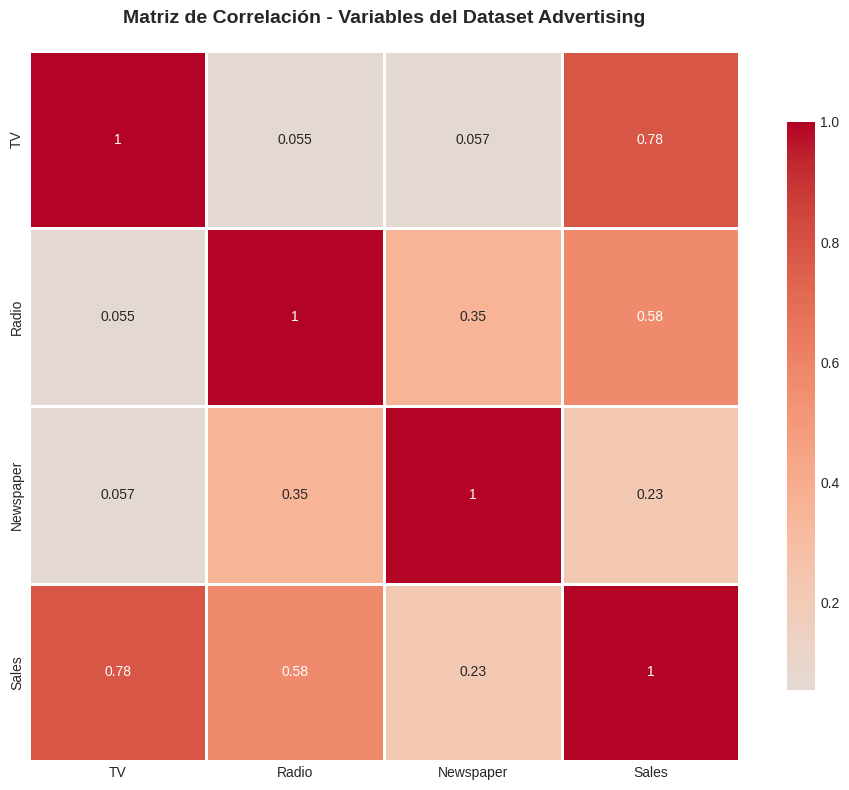

In [7]:
# Matriz de correlación
print("="*60)
print("MATRIZ DE CORRELACIÓN")
print("="*60)
correlation_matrix = ads.corr()
display(correlation_matrix)

# Visualización
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables del Dataset Advertising',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

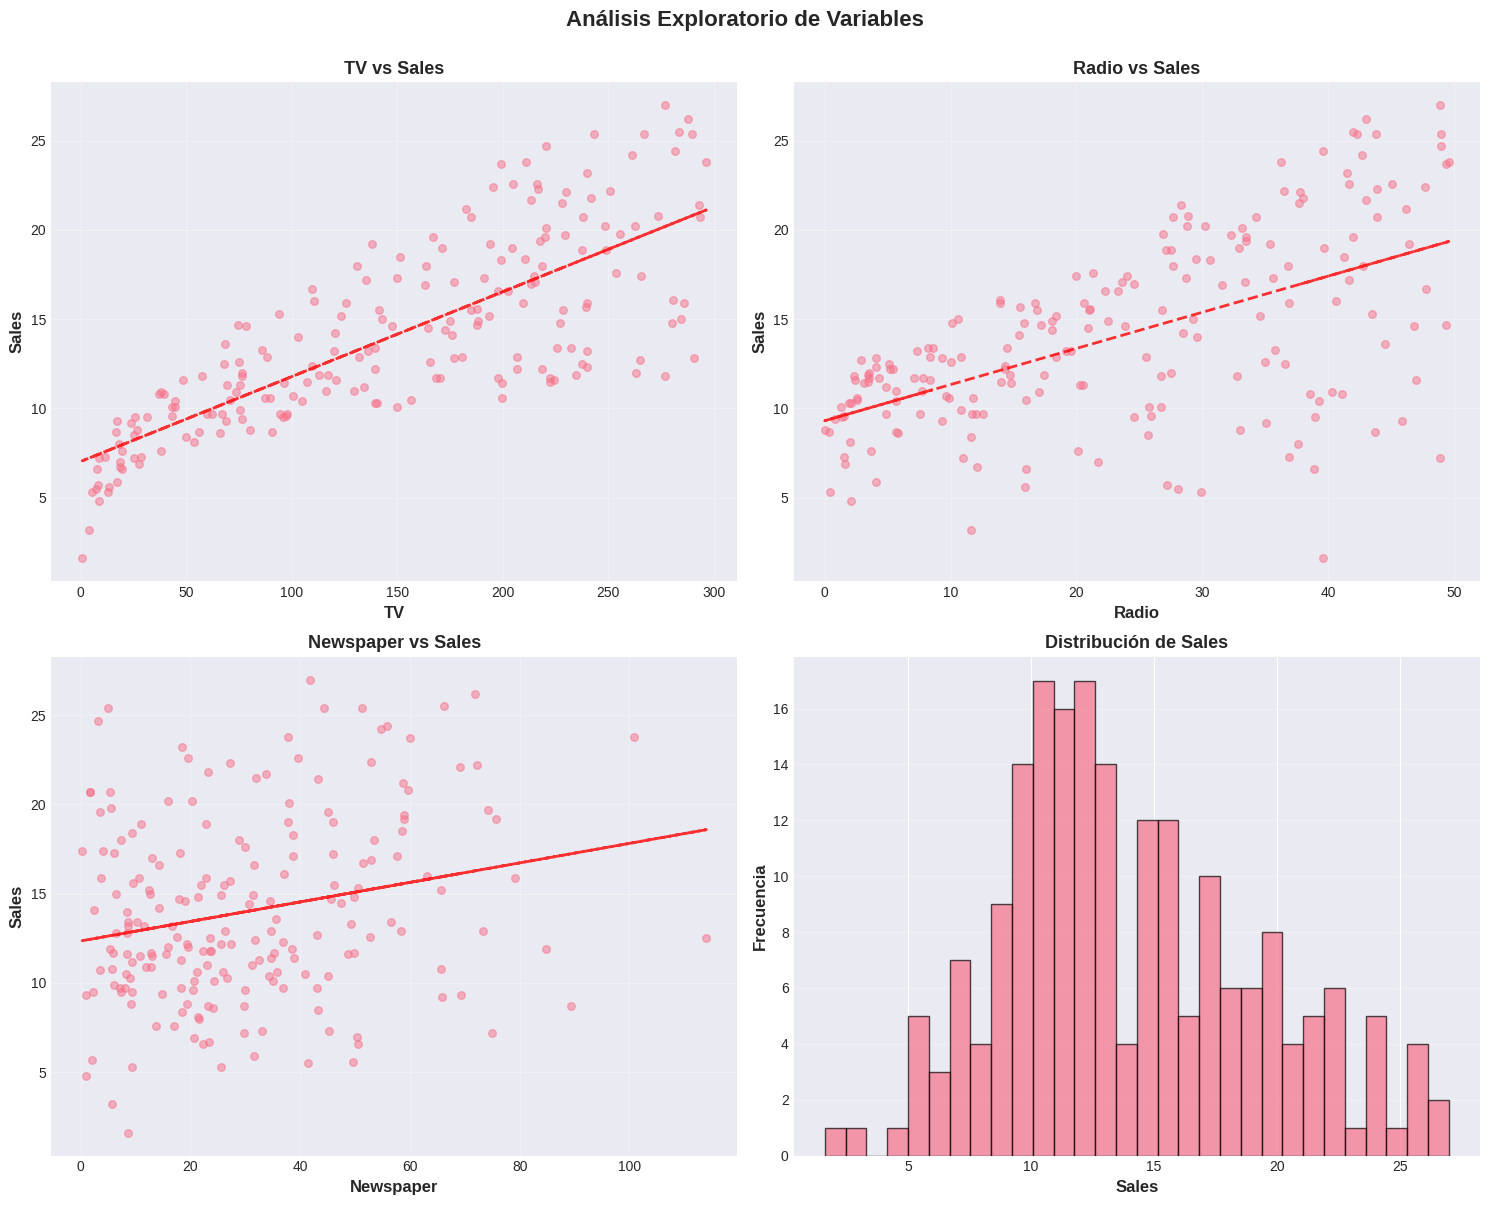

In [8]:
# Visualización de relaciones
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

predictors = ['TV', 'Radio', 'Newspaper']
for idx, predictor in enumerate(predictors):
    row = idx // 2
    col = idx % 2
    axes[row, col].scatter(ads[predictor], ads['Sales'], alpha=0.5, s=30)
    axes[row, col].set_xlabel(predictor, fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel('Sales', fontsize=12, fontweight='bold')
    axes[row, col].set_title(f'{predictor} vs Sales', fontsize=13, fontweight='bold')
    axes[row, col].grid(True, alpha=0.3)

    # Línea de tendencia
    z = np.polyfit(ads[predictor], ads['Sales'], 1)
    p = np.poly1d(z)
    axes[row, col].plot(ads[predictor], p(ads[predictor]), "r--", alpha=0.8, linewidth=2)

# Histograma de Sales
axes[1, 1].hist(ads['Sales'], bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Sales', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Distribución de Sales', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.suptitle('Análisis Exploratorio de Variables', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 4. Partición de Datos (70% Entrenamiento / 30% Validación)

In [9]:
# Partición manual: 70% entrenamiento, 30% validación
np.random.seed(42)  # Para reproducibilidad

# Mezclar índices aleatoriamente
indices = np.random.permutation(ads.index)

# Calcular punto de corte
split_point = int(len(ads) * 0.70)

# Dividir índices
train_indices = indices[:split_point]
test_indices = indices[split_point:]

# Crear conjuntos de entrenamiento y validación
ads_train = ads.loc[train_indices].copy()
ads_test = ads.loc[test_indices].copy()

print("="*60)
print("PARTICIÓN DE DATOS")
print("="*60)
print(f"\nDatos totales: {len(ads)} observaciones")
print(f"\nConjunto de ENTRENAMIENTO:")
print(f"  - Observaciones: {len(ads_train)}")
print(f"  - Proporción: {len(ads_train)/len(ads)*100:.2f}%")

print(f"\nConjunto de VALIDACIÓN/TESTING:")
print(f"  - Observaciones: {len(ads_test)}")
print(f"  - Proporción: {len(ads_test)/len(ads)*100:.2f}%")

print(f"\n✓ Partición completada exitosamente")

PARTICIÓN DE DATOS

Datos totales: 200 observaciones

Conjunto de ENTRENAMIENTO:
  - Observaciones: 140
  - Proporción: 70.00%

Conjunto de VALIDACIÓN/TESTING:
  - Observaciones: 60
  - Proporción: 30.00%

✓ Partición completada exitosamente


## 5. Generación y Ajuste del Modelo con statsmodels

In [10]:
# Crear y ajustar el modelo de regresión lineal múltiple con statsmodels
# OLS = Ordinary Least Squares
modelo = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=ads_train).fit()

print("="*60)
print("MODELO DE REGRESIÓN LINEAL MÚLTIPLE AJUSTADO")
print("="*60)
print("\n✓ Modelo entrenado exitosamente con statsmodels\n")

# Mostrar resumen del modelo
print(modelo.summary())

MODELO DE REGRESIÓN LINEAL MÚLTIPLE AJUSTADO

✓ Modelo entrenado exitosamente con statsmodels

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     451.5
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           1.76e-70
Time:                        10:07:47   Log-Likelihood:                -262.29
No. Observations:                 140   AIC:                             532.6
Df Residuals:                     136   BIC:                             544.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [11]:
# Extraer parámetros del modelo
print("="*60)
print("PARÁMETROS DEL MODELO")
print("="*60)

coeficientes = modelo.params
print("\nCoeficientes:")
print(coeficientes)

intercepto = coeficientes['Intercept']
coef_tv = coeficientes['TV']
coef_radio = coeficientes['Radio']
coef_newspaper = coeficientes['Newspaper']

print(f"\n{'─'*60}")
print("ECUACIÓN DEL MODELO")
print("─"*60)
print(f"\nSales = {intercepto:.4f} + {coef_tv:.4f}*TV + {coef_radio:.4f}*Radio + {coef_newspaper:.4f}*Newspaper")

PARÁMETROS DEL MODELO

Coeficientes:
Intercept    2.9561
TV           0.0468
Radio        0.1871
Newspaper   -0.0048
dtype: float64

────────────────────────────────────────────────────────────
ECUACIÓN DEL MODELO
────────────────────────────────────────────────────────────

Sales = 2.9561 + 0.0468*TV + 0.1871*Radio + -0.0048*Newspaper


## 6. Evaluación del Modelo: Coeficiente de Determinación (R²)

In [12]:
# Obtener R² y R² ajustado del conjunto de entrenamiento
r2_train = modelo.rsquared
r2_adj_train = modelo.rsquared_adj

print("="*60)
print("BONDAD DE AJUSTE - CONJUNTO DE ENTRENAMIENTO")
print("="*60)
print(f"\nCoeficiente de Determinación (R²):          {r2_train:.6f}")
print(f"Coeficiente de Determinación Ajustado (R²): {r2_adj_train:.6f}")

print(f"\n{'─'*60}")
print("INTERPRETACIÓN")
print("─"*60)
print(f"\nEl modelo explica el {r2_train*100:.2f}% de la variabilidad en Sales.")
print(f"Considerando el número de variables, el R² ajustado es {r2_adj_train*100:.2f}%")

# Evaluación cualitativa
if r2_train >= 0.9:
    calidad = "Excelente"
elif r2_train >= 0.7:
    calidad = "Buena"
elif r2_train >= 0.5:
    calidad = "Moderada"
else:
    calidad = "Pobre"

print(f"\nBondad de ajuste: {calidad}")

BONDAD DE AJUSTE - CONJUNTO DE ENTRENAMIENTO

Coeficiente de Determinación (R²):          0.908750
Coeficiente de Determinación Ajustado (R²): 0.906737

────────────────────────────────────────────────────────────
INTERPRETACIÓN
────────────────────────────────────────────────────────────

El modelo explica el 90.88% de la variabilidad en Sales.
Considerando el número de variables, el R² ajustado es 90.67%

Bondad de ajuste: Excelente


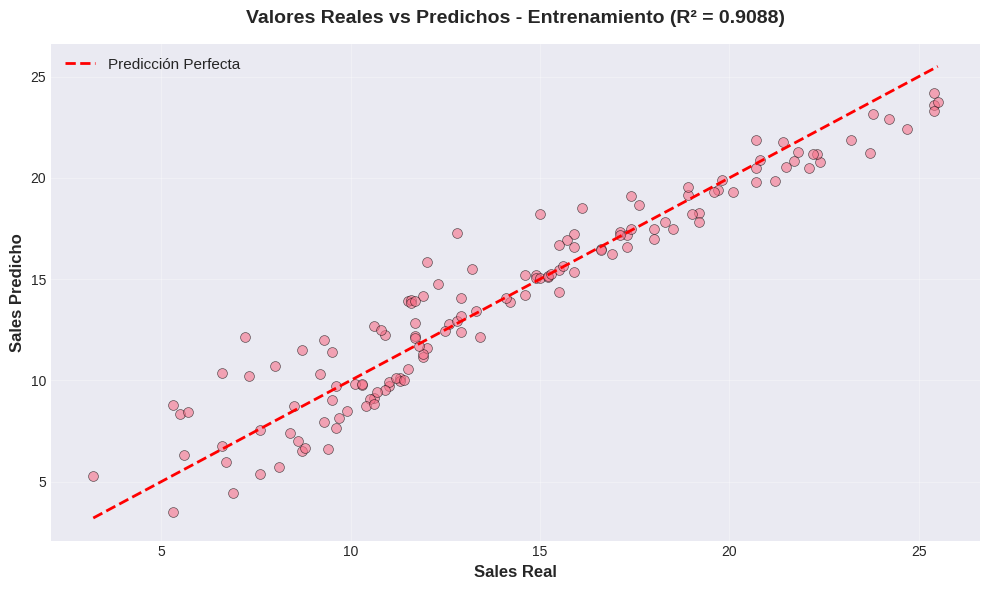

In [13]:
# Predicciones en el conjunto de entrenamiento
y_train_pred = modelo.predict(ads_train)
y_train_real = ads_train['Sales']

# Visualización de valores reales vs predichos (Entrenamiento)
plt.figure(figsize=(10, 6))
plt.scatter(y_train_real, y_train_pred, alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
plt.plot([y_train_real.min(), y_train_real.max()],
         [y_train_real.min(), y_train_real.max()],
         'r--', lw=2, label='Predicción Perfecta')
plt.xlabel('Sales Real', fontsize=12, fontweight='bold')
plt.ylabel('Sales Predicho', fontsize=12, fontweight='bold')
plt.title(f'Valores Reales vs Predichos - Entrenamiento (R² = {r2_train:.4f})',
          fontsize=14, fontweight='bold', pad=15)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

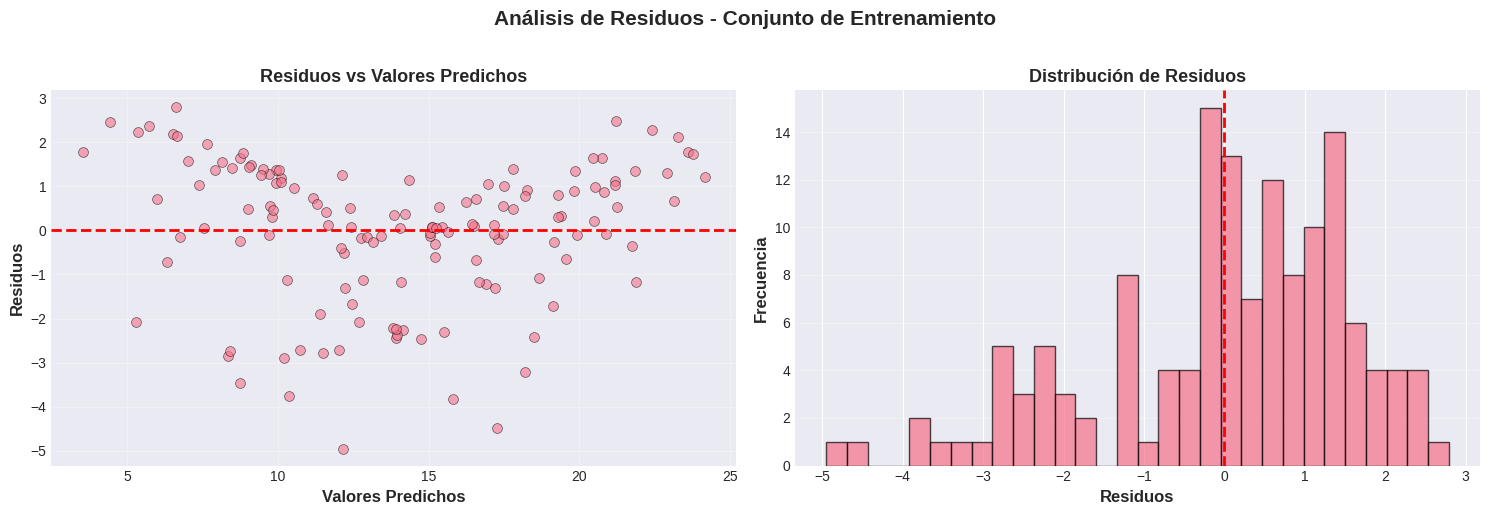

Estadísticas de Residuos:
  Media:              0.000000
  Desviación estándar: 1.581146
  Mínimo:             -4.9502
  Máximo:             2.7904


In [14]:
# Análisis de residuos en el conjunto de entrenamiento
residuos_train = y_train_real - y_train_pred

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Residuos vs Valores Predichos
axes[0].scatter(y_train_pred, residuos_train, alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Valores Predichos', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Residuos', fontsize=12, fontweight='bold')
axes[0].set_title('Residuos vs Valores Predichos', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Histograma de Residuos
axes[1].hist(residuos_train, bins=30, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Residuos', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
axes[1].set_title('Distribución de Residuos', fontsize=13, fontweight='bold')
axes[1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1].grid(True, alpha=0.3, axis='y')

plt.suptitle('Análisis de Residuos - Conjunto de Entrenamiento',
             fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("Estadísticas de Residuos:")
print(f"  Media:              {residuos_train.mean():.6f}")
print(f"  Desviación estándar: {residuos_train.std():.6f}")
print(f"  Mínimo:             {residuos_train.min():.4f}")
print(f"  Máximo:             {residuos_train.max():.4f}")

## 7. Predicciones en el Conjunto de Testing/Validación

In [15]:
# Realizar predicciones en el conjunto de testing
y_test_pred = modelo.predict(ads_test)
y_test_real = ads_test['Sales']

# Calcular R² manualmente para el conjunto de testing
ss_res = np.sum((y_test_real - y_test_pred) ** 2)
ss_tot = np.sum((y_test_real - y_test_real.mean()) ** 2)
r2_test = 1 - (ss_res / ss_tot)

# Calcular R² ajustado para testing
n_test = len(ads_test)
p_test = 3  # número de predictores (TV, Radio, Newspaper)
r2_adj_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

print("="*60)
print("EVALUACIÓN EN CONJUNTO DE TESTING/VALIDACIÓN")
print("="*60)
print(f"\nCoeficiente de Determinación (R²):          {r2_test:.6f}")
print(f"Coeficiente de Determinación Ajustado (R²): {r2_adj_test:.6f}")

print(f"\n{'─'*60}")
print("COMPARACIÓN ENTRENAMIENTO VS TESTING")
print("─"*60)
print(f"\nR² Entrenamiento: {r2_train:.6f}")
print(f"R² Testing:       {r2_test:.6f}")
print(f"Diferencia:       {abs(r2_train - r2_test):.6f}")

# Análisis de sobreajuste
if abs(r2_train - r2_test) < 0.05:
    print(f"\n✓ Modelo generaliza bien (diferencia < 5%)")
elif abs(r2_train - r2_test) < 0.10:
    print(f"\n⚠ Posible ligero sobreajuste (diferencia entre 5-10%)")
else:
    print(f"\n⚠ Posible sobreajuste significativo (diferencia > 10%)")

EVALUACIÓN EN CONJUNTO DE TESTING/VALIDACIÓN

Coeficiente de Determinación (R²):          0.867746
Coeficiente de Determinación Ajustado (R²): 0.860661

────────────────────────────────────────────────────────────
COMPARACIÓN ENTRENAMIENTO VS TESTING
────────────────────────────────────────────────────────────

R² Entrenamiento: 0.908750
R² Testing:       0.867746
Diferencia:       0.041005

✓ Modelo generaliza bien (diferencia < 5%)


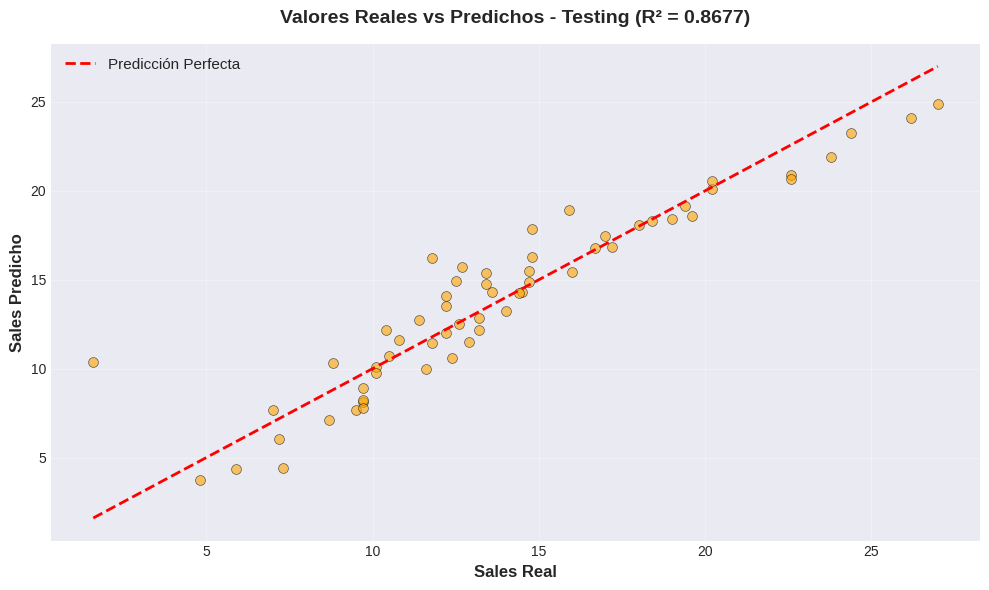

In [16]:
# Visualización de valores reales vs predichos (Testing)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_real, y_test_pred, alpha=0.6, s=50, edgecolors='k', linewidth=0.5, color='orange')
plt.plot([y_test_real.min(), y_test_real.max()],
         [y_test_real.min(), y_test_real.max()],
         'r--', lw=2, label='Predicción Perfecta')
plt.xlabel('Sales Real', fontsize=12, fontweight='bold')
plt.ylabel('Sales Predicho', fontsize=12, fontweight='bold')
plt.title(f'Valores Reales vs Predichos - Testing (R² = {r2_test:.4f})',
          fontsize=14, fontweight='bold', pad=15)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
# Crear DataFrame con predicciones
resultados_test = pd.DataFrame({
    'Real': y_test_real,
    'Predicho': y_test_pred,
    'Error': y_test_real - y_test_pred,
    'Error_Abs': np.abs(y_test_real - y_test_pred),
    'Error_Pct': np.abs((y_test_real - y_test_pred) / y_test_real * 100)
})

print("="*60)
print("MUESTRA DE PREDICCIONES (Primeras 10 observaciones)")
print("="*60)
display(resultados_test.head(10))

print(f"\n{'─'*60}")
print("ESTADÍSTICAS DE ERROR")
print("─"*60)
print(f"\nError promedio:              {resultados_test['Error'].mean():.4f}")
print(f"Error absoluto promedio:     {resultados_test['Error_Abs'].mean():.4f}")
print(f"Error porcentual promedio:   {resultados_test['Error_Pct'].mean():.2f}%")

MUESTRA DE PREDICCIONES (Primeras 10 observaciones)


,Real,Predicho,Error,Error_Abs,Error_Pct
180,10.5,10.7303,-0.2303,0.2303,2.1932
178,11.8,16.2200,-4.4200,4.4200,37.4573
185,22.6,20.8909,1.7091,1.7091,7.5622
49,9.7,8.0983,1.6017,1.6017,16.5120
80,11.8,11.4185,0.3815,0.3815,3.2332
34,9.5,7.6605,1.8395,1.8395,19.3635
7,13.2,12.1913,1.0087,1.0087,7.6420
110,13.4,14.7843,-1.3843,1.3843,10.3305
91,7.3,4.4164,2.8836,2.8836,39.5015
83,13.6,14.3100,-0.7100,0.7100,5.2203



────────────────────────────────────────────────────────────
ESTADÍSTICAS DE ERROR
────────────────────────────────────────────────────────────

Error promedio:              -0.0637
Error absoluto promedio:     1.3244
Error porcentual promedio:   18.95%


## 8. Cálculo del Error Residual Estándar en Ratio (RSE%)

In [18]:
# Calcular el Error Residual Estándar (RSE)
# RSE = sqrt(sum((y_real - y_pred)^2) / (n - p - 1))

n = len(ads_test)  # número de observaciones en testing
p = 3  # número de predictores (TV, Radio, Newspaper)

# Suma de cuadrados de los residuos (RSS)
rss = np.sum((y_test_real - y_test_pred) ** 2)

# Error Residual Estándar (RSE)
rse = np.sqrt(rss / (n - p - 1))

# RSE como porcentaje de la media de y_test (RSE%)
y_test_mean = y_test_real.mean()
rse_percent = (rse / y_test_mean) * 100

print("="*60)
print("ERROR RESIDUAL ESTÁNDAR (RSE) Y RSE%")
print("="*60)

print(f"\nParámetros del cálculo:")
print(f"  n (observaciones):          {n}")
print(f"  p (predictores):            {p}")
print(f"  Grados de libertad (n-p-1): {n - p - 1}")

print(f"\n{'─'*60}")
print("RESULTADOS")
print("─"*60)
print(f"\nRSS (Suma de Cuadrados Residuales): {rss:.4f}")
print(f"RSE (Error Residual Estándar):      {rse:.4f}")
print(f"Media de Sales (testing):           {y_test_mean:.4f}")
print(f"\n{'▶'*3} RSE% (Error Residual Estándar en Ratio): {rse_percent:.4f}%")

print(f"\n{'─'*60}")
print("INTERPRETACIÓN")
print("─"*60)
print(f"\nEn promedio, las predicciones del modelo difieren de los valores")
print(f"reales en aproximadamente {rse:.4f} unidades de Sales.")
print(f"\nEsto representa un error del {rse_percent:.2f}% respecto a la media.")

# Evaluación cualitativa del RSE%
if rse_percent < 5:
    calidad_rse = "Excelente"
elif rse_percent < 10:
    calidad_rse = "Muy buena"
elif rse_percent < 15:
    calidad_rse = "Buena"
elif rse_percent < 20:
    calidad_rse = "Aceptable"
else:
    calidad_rse = "Requiere mejora"

print(f"\nCapacidad predictiva del modelo: {calidad_rse}")

ERROR RESIDUAL ESTÁNDAR (RSE) Y RSE%

Parámetros del cálculo:
  n (observaciones):          60
  p (predictores):            3
  Grados de libertad (n-p-1): 56

────────────────────────────────────────────────────────────
RESULTADOS
────────────────────────────────────────────────────────────

RSS (Suma de Cuadrados Residuales): 212.4255
RSE (Error Residual Estándar):      1.9476
Media de Sales (testing):           13.8450

▶▶▶ RSE% (Error Residual Estándar en Ratio): 14.0675%

────────────────────────────────────────────────────────────
INTERPRETACIÓN
────────────────────────────────────────────────────────────

En promedio, las predicciones del modelo difieren de los valores
reales en aproximadamente 1.9476 unidades de Sales.

Esto representa un error del 14.07% respecto a la media.

Capacidad predictiva del modelo: Buena


In [19]:
# Cálculo de métricas adicionales
mae = np.mean(np.abs(y_test_real - y_test_pred))
mse = np.mean((y_test_real - y_test_pred) ** 2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_real - y_test_pred) / y_test_real)) * 100

print("="*60)
print("MÉTRICAS ADICIONALES DE EVALUACIÓN")
print("="*60)
print(f"\nMAE  (Mean Absolute Error):            {mae:.4f}")
print(f"MSE  (Mean Squared Error):             {mse:.4f}")
print(f"RMSE (Root Mean Squared Error):        {rmse:.4f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.4f}%")
print(f"RSE  (Residual Standard Error):        {rse:.4f}")
print(f"RSE% (RSE en Ratio):                   {rse_percent:.4f}%")

MÉTRICAS ADICIONALES DE EVALUACIÓN

MAE  (Mean Absolute Error):            1.3244
MSE  (Mean Squared Error):             3.5404
RMSE (Root Mean Squared Error):        1.8816
MAPE (Mean Absolute Percentage Error): 18.9475%
RSE  (Residual Standard Error):        1.9476
RSE% (RSE en Ratio):                   14.0675%


## 9. Resumen Ejecutivo de Resultados

In [20]:
print("\n" + "="*70)
print(" " * 20 + "RESUMEN EJECUTIVO" + " " * 20)
print("="*70)

print(f"\n{'▶'*3} ECUACIÓN DEL MODELO:")
print(f"\n    Sales = {intercepto:.4f} + {coef_tv:.4f}*TV + {coef_radio:.4f}*Radio + {coef_newspaper:.4f}*Newspaper")

print(f"\n{'─'*70}")
print(f"{'▶'*3} BONDAD DE AJUSTE:")
print(f"\n    • R² (Entrenamiento):  {r2_train:.4f} ({r2_train*100:.2f}% de varianza explicada)")
print(f"    • R² (Testing):        {r2_test:.4f} ({r2_test*100:.2f}% de varianza explicada)")
print(f"    • R² Ajustado (Train): {r2_adj_train:.4f}")
print(f"    • R² Ajustado (Test):  {r2_adj_test:.4f}")

print(f"\n{'─'*70}")
print(f"{'▶'*3} ERROR DEL MODELO:")
print(f"\n    • RSE (Error Residual Estándar): {rse:.4f}")
print(f"    • RSE% (Error en Ratio):         {rse_percent:.4f}%")
print(f"    • RMSE:                          {rmse:.4f}")
print(f"    • MAE:                           {mae:.4f}")
print(f"    • MAPE:                          {mape:.2f}%")

print(f"\n{'─'*70}")
print(f"{'▶'*3} INTERPRETACIÓN DE COEFICIENTES:")
print(f"\n    • TV:        Por cada unidad adicional en TV, Sales aumenta {coef_tv:.4f}")
print(f"    • Radio:     Por cada unidad adicional en Radio, Sales aumenta {coef_radio:.4f}")
print(f"    • Newspaper: Por cada unidad adicional en Newspaper, Sales cambia {coef_newspaper:.4f}")

# Identificar variable más importante
coefs_abs = {'TV': abs(coef_tv), 'Radio': abs(coef_radio), 'Newspaper': abs(coef_newspaper)}
var_importante = max(coefs_abs, key=coefs_abs.get)

print(f"\n{'─'*70}")
print(f"{'▶'*3} CONCLUSIONES:")
print(f"\n    1. El modelo explica {r2_test*100:.2f}% de la variabilidad en Sales")
print(f"    2. El error promedio de predicción es del {rse_percent:.2f}%")
print(f"    3. Capacidad predictiva: {calidad_rse}")
print(f"    4. {var_importante} tiene el mayor impacto en Sales")

print(f"\n{'='*70}\n")


                    RESUMEN EJECUTIVO                    

▶▶▶ ECUACIÓN DEL MODELO:

    Sales = 2.9561 + 0.0468*TV + 0.1871*Radio + -0.0048*Newspaper

──────────────────────────────────────────────────────────────────────
▶▶▶ BONDAD DE AJUSTE:

    • R² (Entrenamiento):  0.9088 (90.88% de varianza explicada)
    • R² (Testing):        0.8677 (86.77% de varianza explicada)
    • R² Ajustado (Train): 0.9067
    • R² Ajustado (Test):  0.8607

──────────────────────────────────────────────────────────────────────
▶▶▶ ERROR DEL MODELO:

    • RSE (Error Residual Estándar): 1.9476
    • RSE% (Error en Ratio):         14.0675%
    • RMSE:                          1.8816
    • MAE:                           1.3244
    • MAPE:                          18.95%

──────────────────────────────────────────────────────────────────────
▶▶▶ INTERPRETACIÓN DE COEFICIENTES:

    • TV:        Por cada unidad adicional en TV, Sales aumenta 0.0468
    • Radio:     Por cada unidad adicional en Radio, Sales

## 10. Visualización Comparativa Final

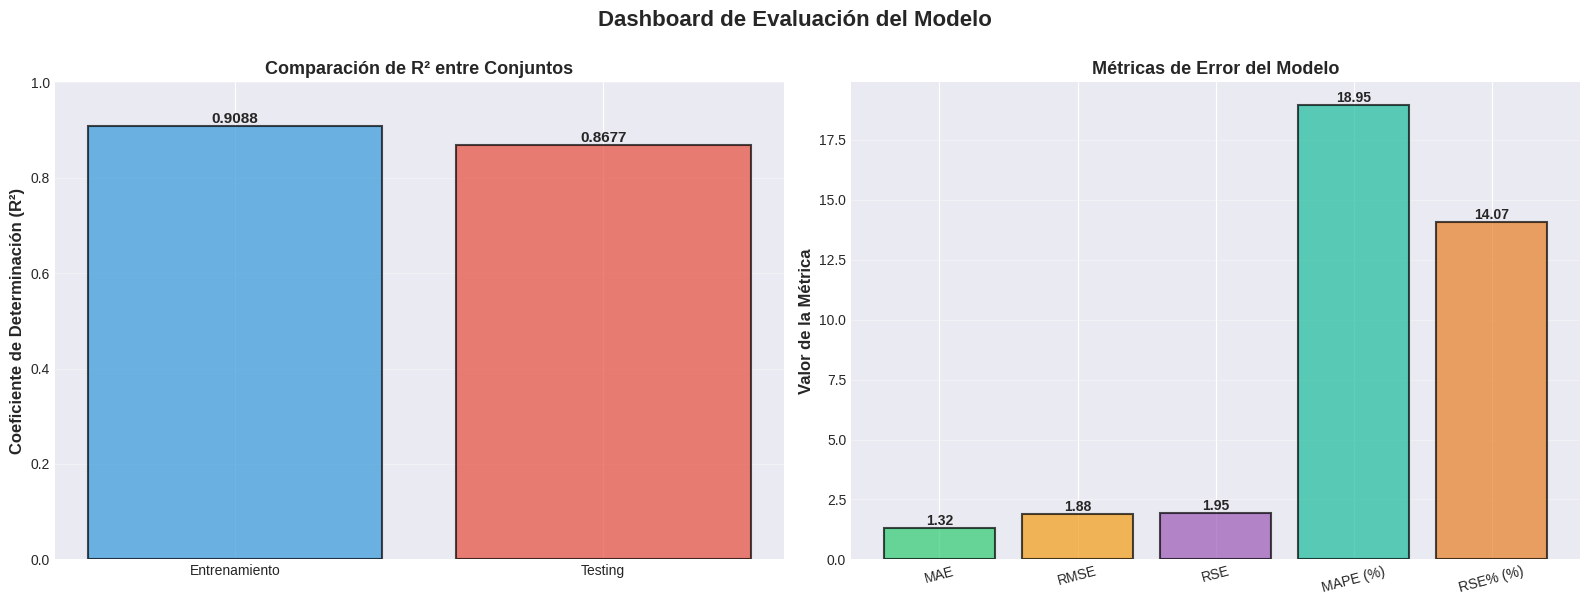

In [21]:
# Gráfico comparativo de métricas
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Comparación de R²
r2_values = [r2_train, r2_test]
r2_labels = ['Entrenamiento', 'Testing']
colors_r2 = ['#3498db', '#e74c3c']

bars1 = axes[0].bar(r2_labels, r2_values, color=colors_r2, alpha=0.7, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Coeficiente de Determinación (R²)', fontsize=12, fontweight='bold')
axes[0].set_title('Comparación de R² entre Conjuntos', fontsize=13, fontweight='bold')
axes[0].set_ylim([0, 1])
axes[0].grid(True, alpha=0.3, axis='y')

for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Subplot 2: Métricas de Error
error_metrics = ['MAE', 'RMSE', 'RSE', 'MAPE (%)', 'RSE% (%)']
error_values = [mae, rmse, rse, mape, rse_percent]
colors_err = ['#2ecc71', '#f39c12', '#9b59b6', '#1abc9c', '#e67e22']

bars2 = axes[1].bar(error_metrics, error_values, color=colors_err, alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Valor de la Métrica', fontsize=12, fontweight='bold')
axes[1].set_title('Métricas de Error del Modelo', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].tick_params(axis='x', rotation=15)

for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.suptitle('Dashboard de Evaluación del Modelo', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

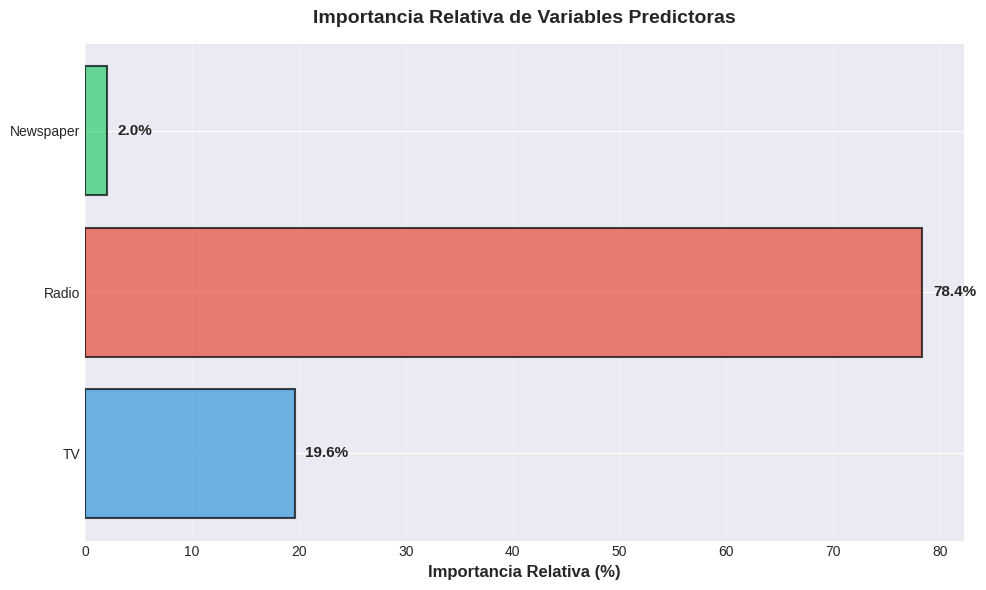


Importancia Relativa de Variables:
  TV          :  19.61%
  Radio       :  78.38%
  Newspaper   :   2.01%


In [22]:
# Importancia relativa de las variables
coef_abs = np.array([abs(coef_tv), abs(coef_radio), abs(coef_newspaper)])
coef_norm = coef_abs / coef_abs.sum() * 100
variables = ['TV', 'Radio', 'Newspaper']

plt.figure(figsize=(10, 6))
bars = plt.barh(variables, coef_norm, color=['#3498db', '#e74c3c', '#2ecc71'],
                alpha=0.7, edgecolor='black', linewidth=1.5)
plt.xlabel('Importancia Relativa (%)', fontsize=12, fontweight='bold')
plt.title('Importancia Relativa de Variables Predictoras', fontsize=14, fontweight='bold', pad=15)
plt.grid(True, alpha=0.3, axis='x')

for i, (bar, value) in enumerate(zip(bars, coef_norm)):
    plt.text(value + 1, bar.get_y() + bar.get_height()/2,
             f'{value:.1f}%', va='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("\nImportancia Relativa de Variables:")
for variable, importance in zip(variables, coef_norm):
    print(f"  {variable:12s}: {importance:6.2f}%")

---

## Fin del Análisis

**Conclusión:** Se ha generado exitosamente un modelo de regresión lineal múltiple utilizando **statsmodels** para predecir las ventas en función de los gastos en publicidad. El modelo ha sido evaluado mediante:

1. ✓ Partición de datos (70/30)
2. ✓ Ajuste del modelo con statsmodels OLS
3. ✓ Evaluación con R² y R² ajustado
4. ✓ Cálculo de RSE y RSE%
5. ✓ Validación con múltiples métricas

---

**Autor:** Agustín Villarreal  
**Contacto:** agustin.villarreal0743@alumnos.udg.mx  
**Programa:** Maestría en Cómputo Aplicado  
**Fecha:** Octubre 2025